<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])
print(X)
print(y)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

]**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [6]:

boston_df = boston = pd.concat([y, X], axis=1)
boston_df.shape

(506, 14)

In [7]:
boston_df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
boston_df.isnull().any()


MEDV       False
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [10]:
boston_df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
boston_df.median()

MEDV        21.20000
CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

In [12]:
boston_df.nunique()


MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

/Users/Meghna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

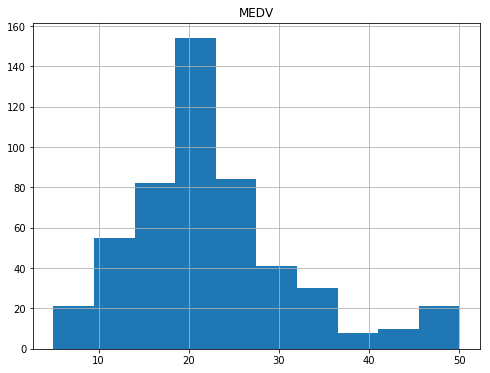

<Figure size 432x288 with 0 Axes>

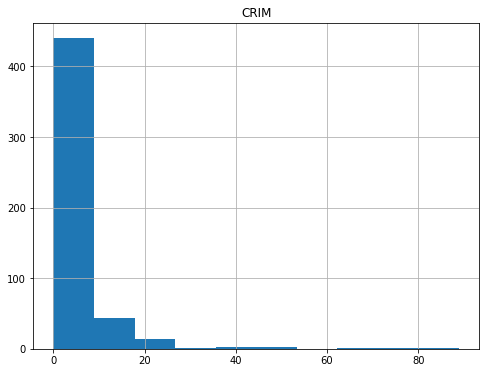

<Figure size 432x288 with 0 Axes>

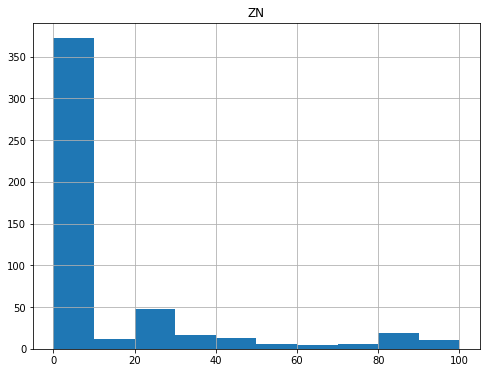

<Figure size 432x288 with 0 Axes>

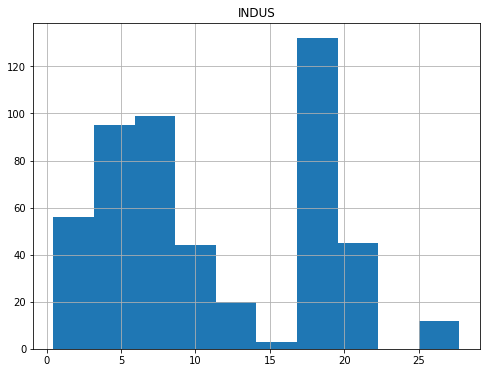

<Figure size 432x288 with 0 Axes>

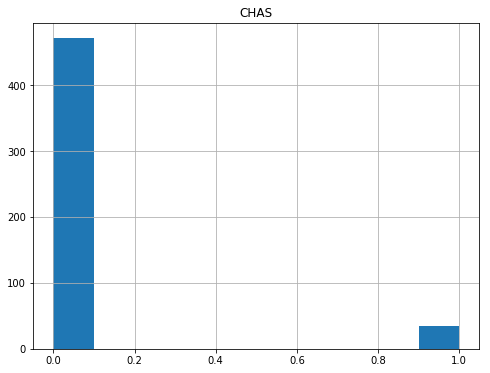

<Figure size 432x288 with 0 Axes>

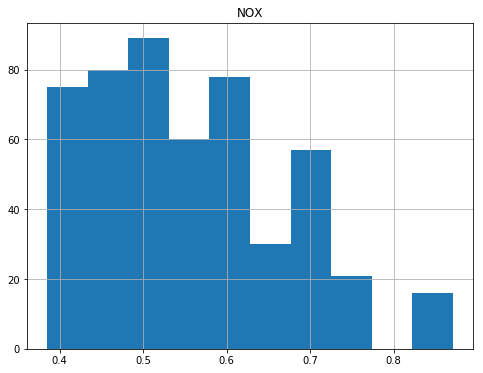

<Figure size 432x288 with 0 Axes>

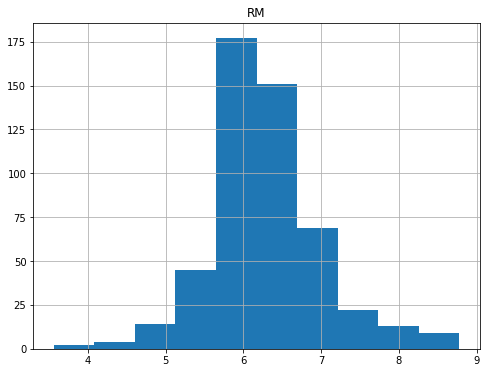

<Figure size 432x288 with 0 Axes>

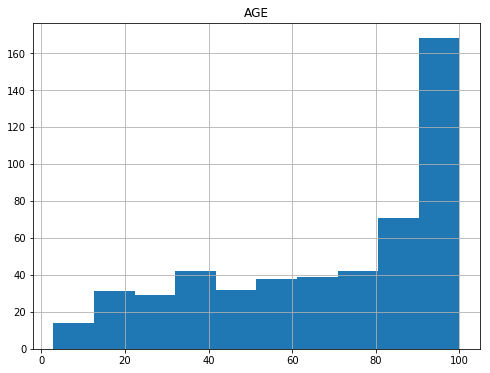

<Figure size 432x288 with 0 Axes>

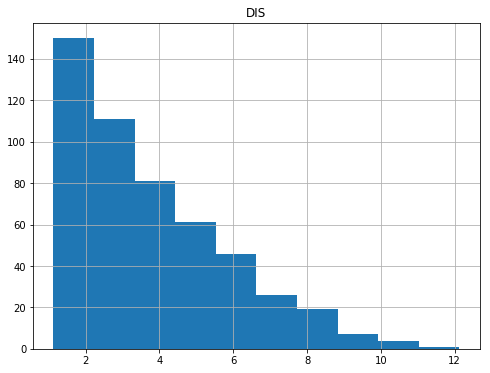

<Figure size 432x288 with 0 Axes>

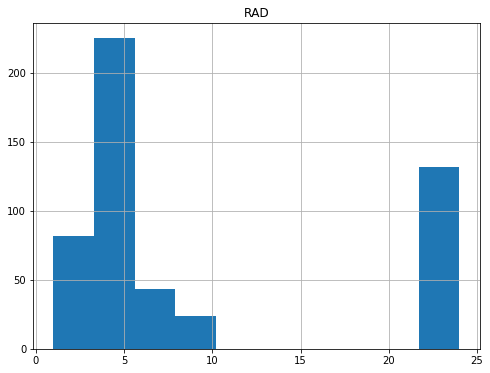

<Figure size 432x288 with 0 Axes>

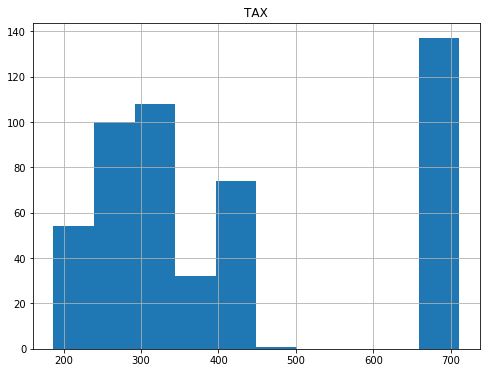

<Figure size 432x288 with 0 Axes>

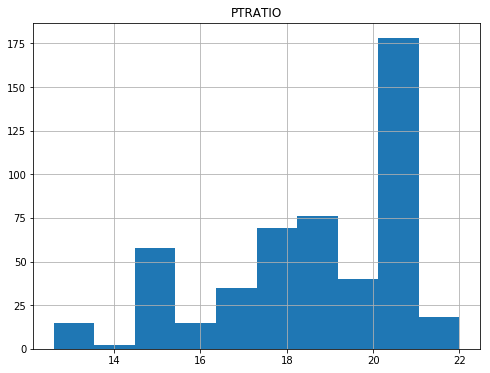

<Figure size 432x288 with 0 Axes>

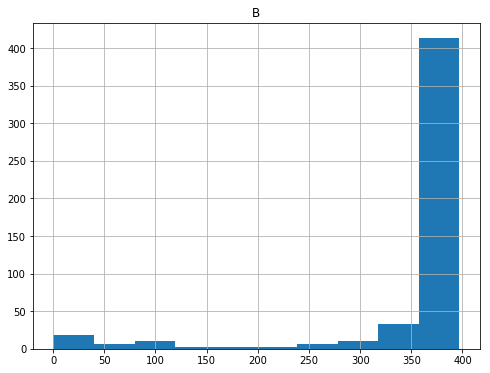

<Figure size 432x288 with 0 Axes>

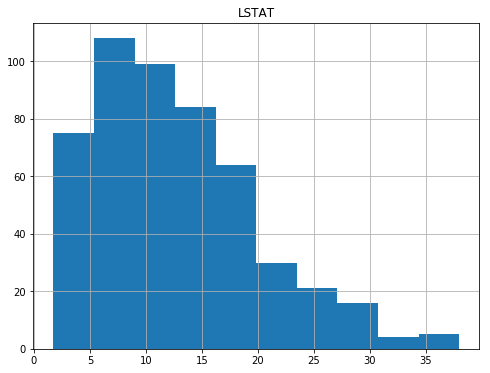

In [13]:
import matplotlib.pyplot as plt

for column in boston_df:
    plt.figure()
    ax=boston_df.hist([column],figsize=(8,6))
    

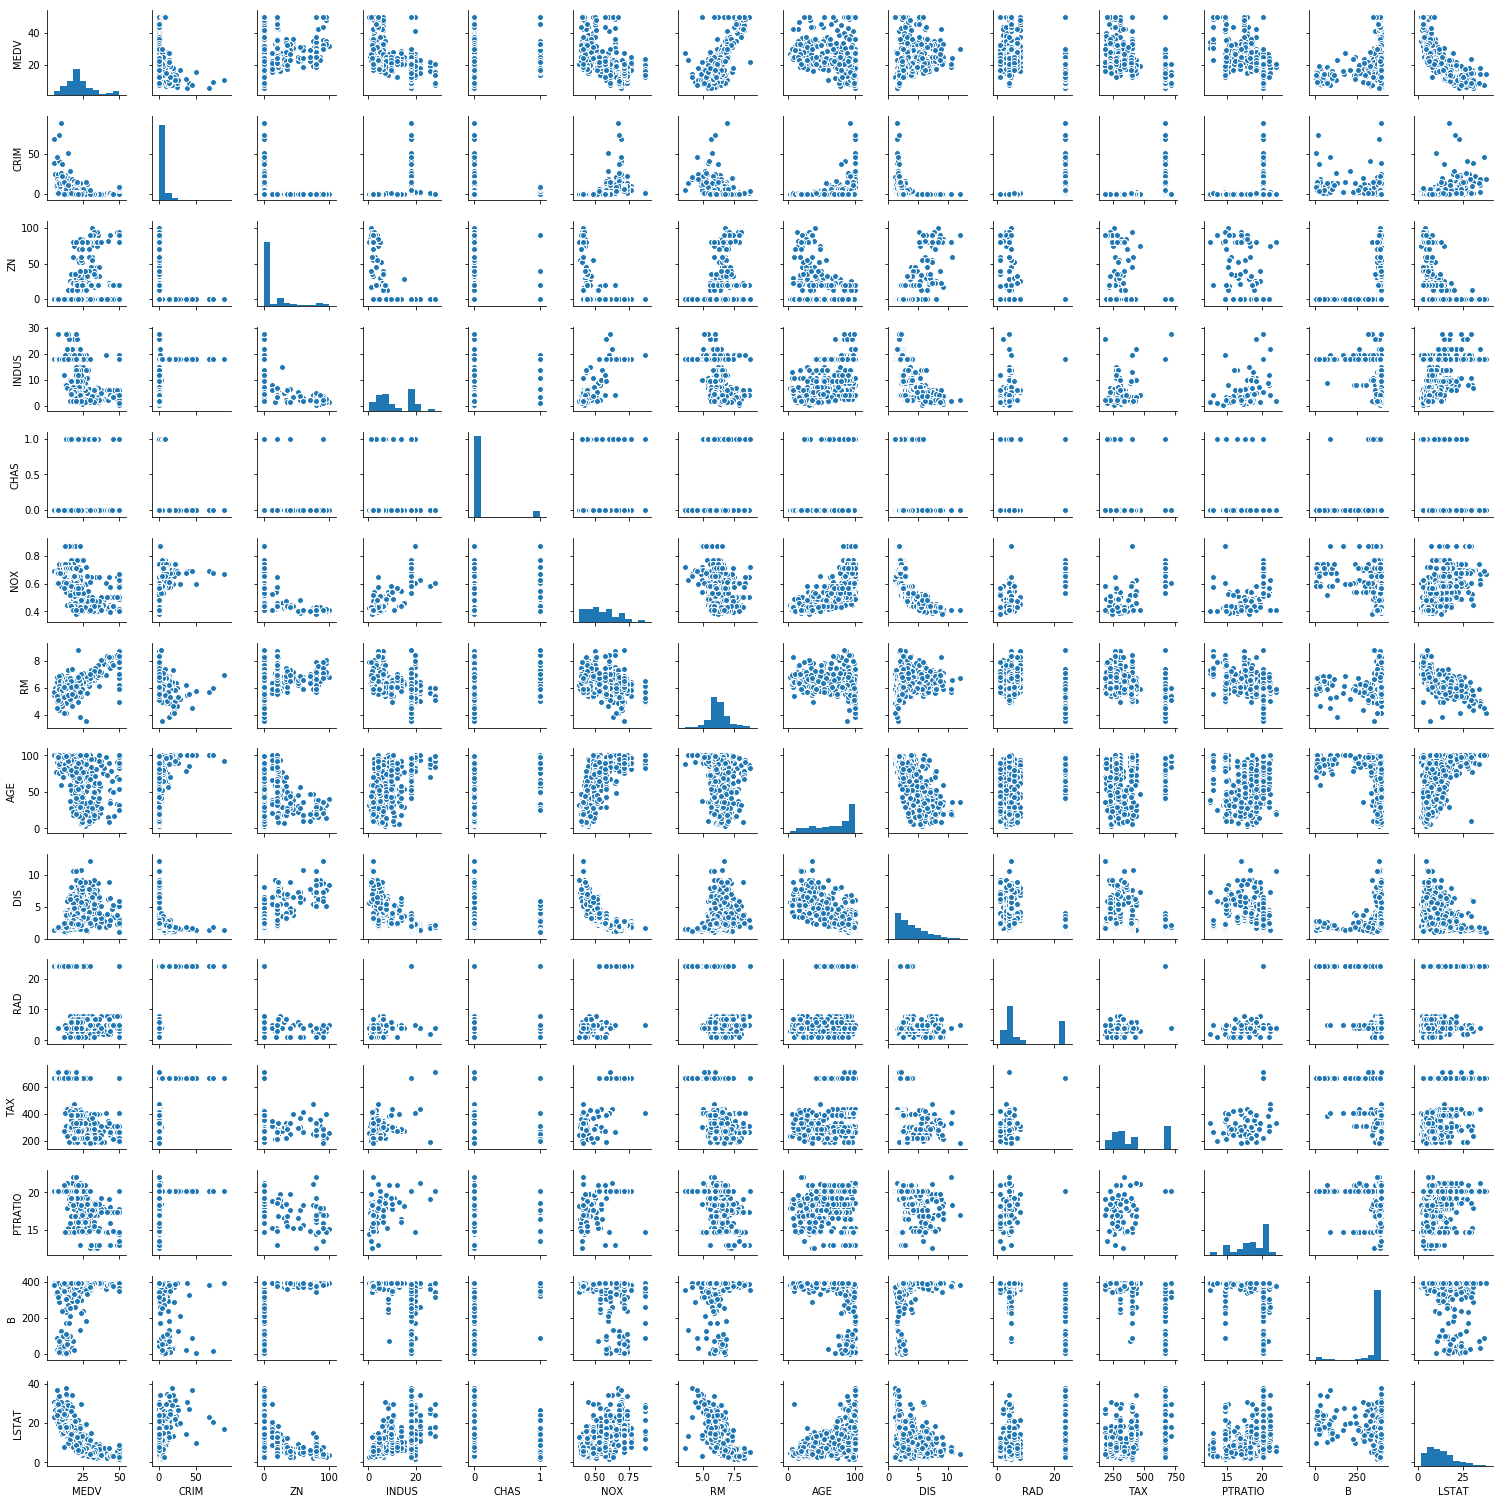

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(boston_df, size=1.5);
plt.show()

In [15]:
boston_df.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.385832,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,0.360445,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


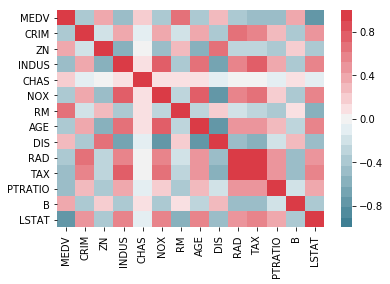

In [16]:
ax = sns.heatmap(
    boston_df.corr(),
    vmin=-1, vmax=1, # Make the scale span -1 to 1
    cmap=sns.diverging_palette(220, 10, n=21), # Use a diverging blue-red scale with 21 levels
)

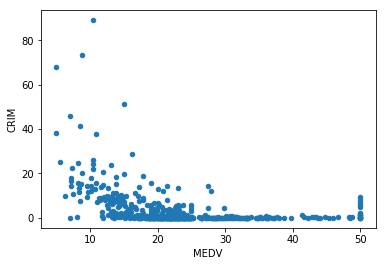

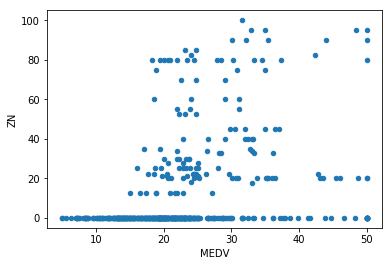

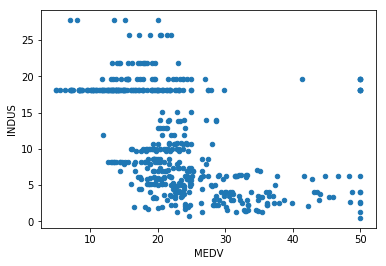

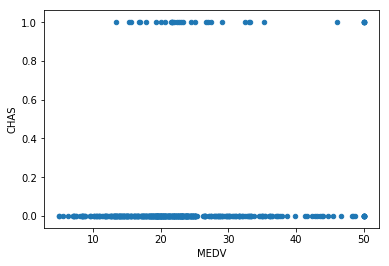

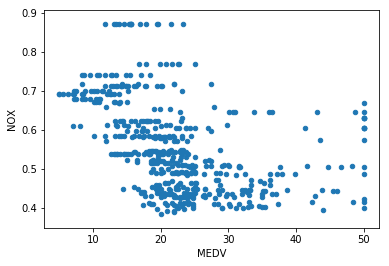

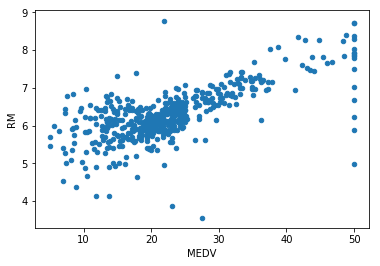

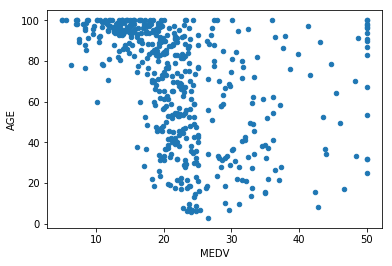

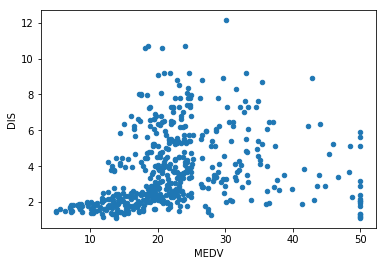

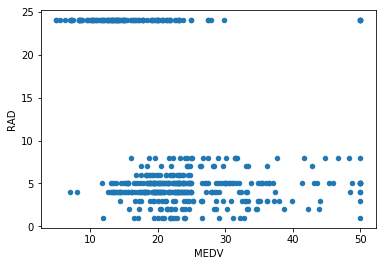

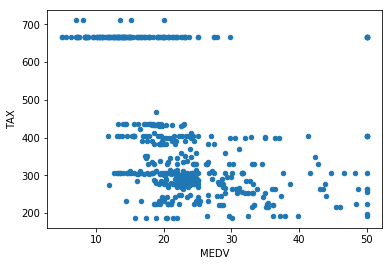

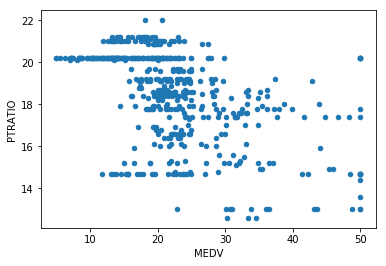

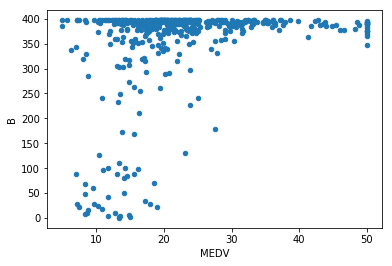

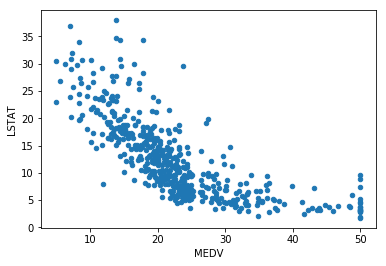

In [17]:
ax = boston_df.plot(x='MEDV', y='CRIM', kind='scatter')
ax = boston_df.plot(x='MEDV', y='ZN', kind='scatter')
ax = boston_df.plot(x='MEDV', y='INDUS', kind='scatter')
ax = boston_df.plot(x='MEDV', y='CHAS', kind='scatter')
ax = boston_df.plot(x='MEDV', y='NOX', kind='scatter')
ax = boston_df.plot(x='MEDV', y='RM', kind='scatter')
ax = boston_df.plot(x='MEDV', y='AGE', kind='scatter')
ax = boston_df.plot(x='MEDV', y='DIS', kind='scatter')
ax = boston_df.plot(x='MEDV', y='RAD', kind='scatter')
ax = boston_df.plot(x='MEDV', y='TAX', kind='scatter')
ax = boston_df.plot(x='MEDV', y='PTRATIO', kind='scatter')
ax = boston_df.plot(x='MEDV', y='B', kind='scatter')
ax = boston_df.plot(x='MEDV', y='LSTAT', kind='scatter')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [18]:
from sklearn import metrics
null_pred = np.zeros(len(y)) + np.mean(y['MEDV'])
null_mse = (metrics.mean_squared_error(null_pred, y['MEDV']))

print(null_mse)

84.41955615616554


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [19]:
from sklearn.cross_validation import train_test_split
def split_data():
    # Get the features and labels from the Boston housing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
    #print "X_training:", X_train.shape
    #print "X_test:", X_test.shape 
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data()
print('X....details')
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)
print('**************')
print('y....details')
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

X....details
(506, 13)
(354, 13)
(152, 13)
**************
y....details
(506, 1)
(354, 1)
(152, 1)


/Users/Meghna/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
from sklearn import metrics
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

20.19770234867637
28.37644965546681


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [30]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

In [31]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds on test data: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 29.76254800915764
R2: 0.7392056508842558

Model 2
MSE: 25.32471471743494
R2: 0.7387863036987183

Model 3
MSE: 24.45303184389111
R2: 0.7400457211655036

Model 4
MSE: 20.76373391056441
R2: 0.7390301289043384

Model 5
MSE: 22.400970189981795
R2: 0.7396331443404317

Model 6
MSE: 30.58217466915119
R2: 0.7399884773543999

Model 7
MSE: 30.558373365682147
R2: 0.738562089523945

Model 8
MSE: 10.689354644939375
R2: 0.7400438918900527

Model 9
MSE: 20.090615060890443
R2: 0.738804692426694

Model 10
MSE: 24.470143199055197
R2: 0.738999109230408

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds on test data: 23.909565961074826
Mean of R2 for all folds: 0.7393099209418746


In [32]:
mse_values.append(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index, :])))
print('Mean of MSE for all folds on Training data: {}'.format(np.mean(mse_values)))

Mean of MSE for all folds on Training data: 23.71473380706652


In [33]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=10, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))

24.036784671448547


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

less bias more variance

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

it is more predictive on training data .

- How much of a bias problem does your model appear to have? Why do you say that?

- How much of a variance problem does your model appear to have? Why do you say that?

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

decreases bias and increases variance

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [34]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [35]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [36]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [37]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [38]:
iris.shape

(150, 6)

In [39]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [40]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
species_num     False
dtype: bool

In [41]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

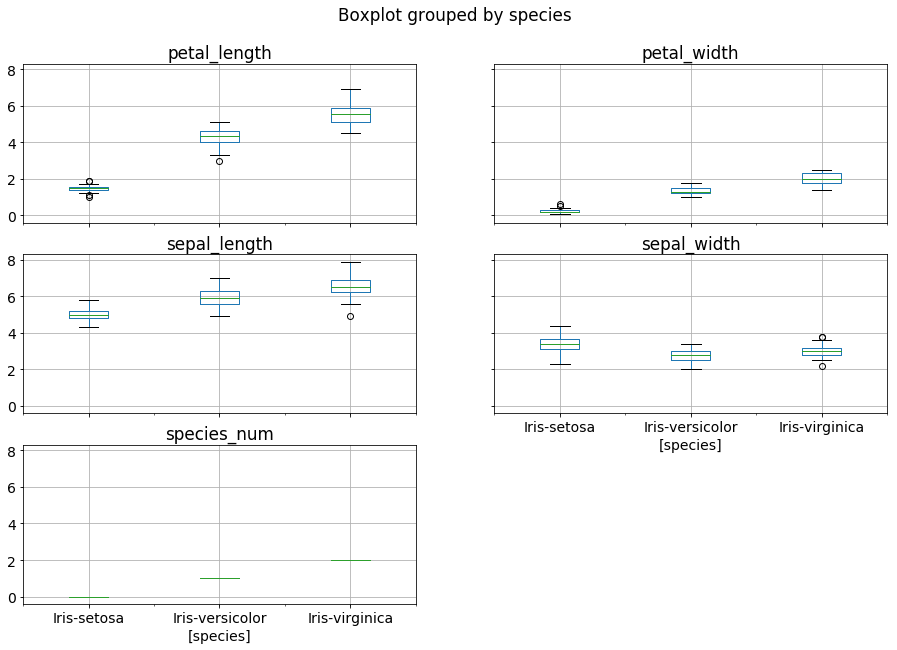

In [43]:
ax = iris.boxplot( by='species',figsize=(15,10));

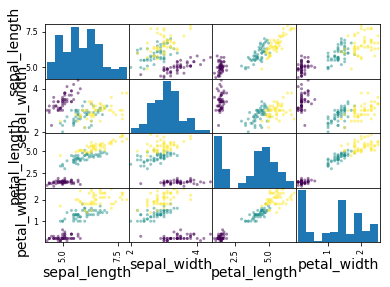

In [44]:
ax_array = pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.loc[:, 'species_num']);

In [64]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [45]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = iris[feature_columns].values
y = iris['species'].values

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


In [50]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9736842105263158


In [53]:
iris.loc[:,'species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [54]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

- Get the accuracy of a null model that simply predicts the most common species.

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [55]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.02631578947368418


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

high bias and low variance

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

bias

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [59]:
train_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    train_scores.append([k, score])

In [60]:
scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])

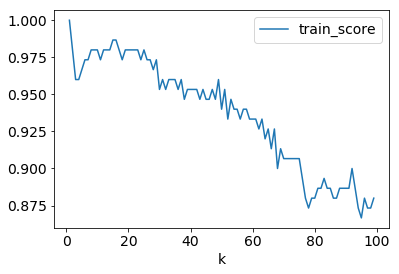

In [61]:
ax = scores_df.plot(kind='line', x='k', y='train_score')

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [62]:
test_scores = []

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=99, shuffle=True)
)

for k in range(1, 100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    test_scores.append(test_accuracy)

In [63]:
scores_df.loc[:, 'test_score'] = test_scores

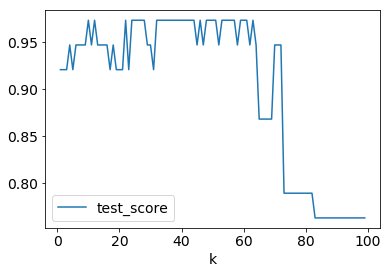

In [64]:
ax = scores_df.plot(kind='line', x='k', y='test_score')

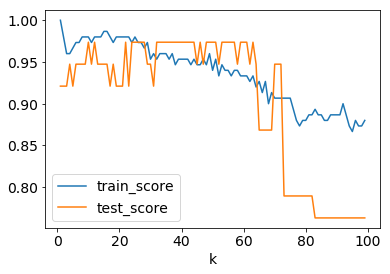

In [65]:
ax = scores_df.plot(kind='line', x='k', y='train_score')
scores_df.plot(kind='line', x='k', y='test_score', ax=ax);

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))